In [1]:
import numpy as np
import pygame
from squid_env import trainSquid, opponent


from matplotlib import pyplot as plt
from Q_learing import Q_learning
from Q_learning_train import QLearningTraining
from squid_env import trainSquid, opponent

pygame 2.5.2 (SDL 2.28.3, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


episode: 0, reward: -17
episode: 50, reward: -92
episode: 100, reward: -31
episode: 150, reward: -121
episode: 200, reward: -101
episode: 250, reward: -86
episode: 300, reward: -85
episode: 350, reward: -25
episode: 400, reward: -117
episode: 450, reward: -137
episode: 500, reward: -47
episode: 550, reward: 96
episode: 600, reward: -48
episode: 650, reward: -71
episode: 700, reward: 81
episode: 750, reward: -8
episode: 800, reward: -60
episode: 850, reward: -40
episode: 900, reward: -27
episode: 950, reward: 51
episode: 1000, reward: -86
episode: 1050, reward: -8
episode: 1100, reward: -84
episode: 1150, reward: -71
episode: 1200, reward: -50
episode: 1250, reward: -99
episode: 1300, reward: -157
episode: 1350, reward: -10
episode: 1400, reward: -115
episode: 1450, reward: -73
episode: 1500, reward: -28
episode: 1550, reward: -87
episode: 1600, reward: -9
episode: 1650, reward: -113
episode: 1700, reward: 34
episode: 1750, reward: -150
episode: 1800, reward: -50
episode: 1850, reward: 

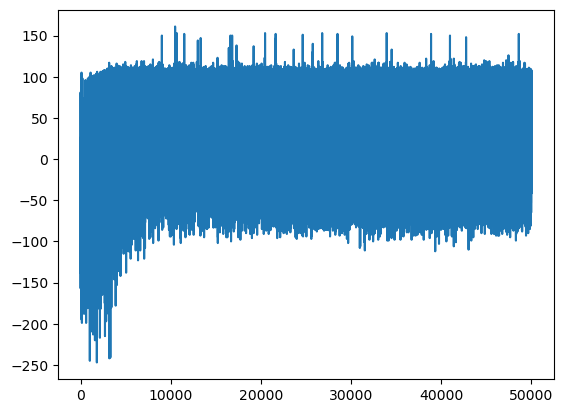

In [2]:
agent = Q_learning((4, 4, 4, 4, 4, 4, 4, 4), ["LEFT","RIGHT", "DOWN", "UP"])



# 創建環境和 Q-learning 代理
env = trainSquid(level=8)  # 確保設定 render=False 進行訓練
episodes = 10000

# 初始化訓練類
q_learning_trainer = QLearningTraining(
    agent=agent, 
    env=env, 
    episodes=episodes, 
    initial_lr=1, 
    gamma=0.99
)


# 開始訓練
q_learning_trainer.train()




In [6]:
def show():
        
    state, reward, terminated, truncated, _ = q_learning_trainer.env.reset()
    while True:
        q_learning_trainer.env.render()
        commands = {"1P" : [q_learning_trainer.agent.step(tuple(state[0]), 0)],  
                    "2P" : [opponent(tuple(state[1]))]}
        

        next_state, reward, terminated, truncated, _ = \
            q_learning_trainer.env.step(commands)
        

        state = next_state#感你娘機掰
        
        
        if (terminated):
            break

In [9]:
show()
pygame.quit()

In [10]:
import pickle
with open("4wayPotential.pickle", "wb") as f:
    pickle.dump(q_learning_trainer.agent.Q_form, f)